<a href="https://colab.research.google.com/github/seungyoonnam/machine-learning/blob/main/wine__tree%2C_RF%2C_ET%2C_GB%2C_HGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

wine 데이터 세트

https://archive.ics.uci.edu/dataset/186/wine+quality

#결정트리

In [76]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [77]:
#결측치 확인
wine.isna().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [78]:
pd.unique(wine['class'])

array([0., 1.])

<Axes: >

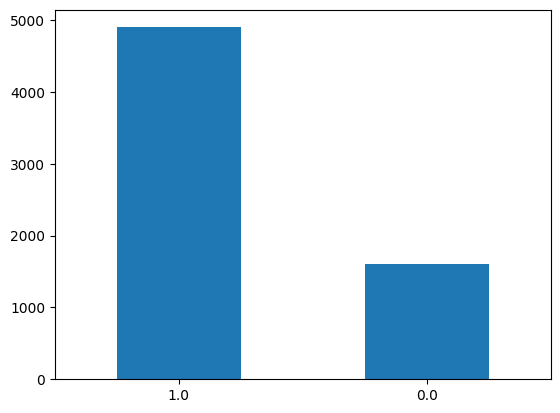

In [79]:
#1: red, 0:white

import matplotlib.pyplot as plt

count_classes=pd.value_counts(wine['class'], sort=True)
count_classes.plot(kind='bar', rot=0)

In [80]:
import numpy as np

wine_input=wine.drop(columns='class').to_numpy()
wine_target=wine['class'].to_numpy()


#훈련세트 테스트세트 분리
from sklearn.model_selection import train_test_split

#stratify: 샘플링편향 방지
train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target, test_size=0.2, random_state=42, stratify=wine_target)

In [81]:
#데이터 정규화
#트리는 안해도 되지만 앞선 모델들은 필수

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#결정트리

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9978833942659227
0.8646153846153846


In [83]:
#최적화
from sklearn.model_selection import GridSearchCV  #GridSearchCrossValidation

#하이퍼파라미터, 범위 지정(min_impurity_decrease, max_Depth, min_samples_split)
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),  #0.0001부터 시작해 0.001이 될때까지 0.0001씩 늘려가며
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

print(gs.best_params_)

{'max_depth': 19, 'min_impurity_decrease': 0.0002, 'min_samples_split': 2}


In [84]:
dt = gs.best_estimator_

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9326534539157206
0.8692307692307693


#랜덤포레스트

In [85]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9981720130385032
0.8937817428000298


In [86]:
#최적화

#하이퍼파라미터, 범위 지정
params = {'n_estimators': [100, 200, 300],           # 트리의 개수 후보
    'max_depth': [None, 10, 20, 30],           # 트리의 최대 깊이 후보
    'min_samples_split': [2, 5, 10],           # 내부 노드를 분할하기 위한 최소 샘플 수 후보
          }

gs = GridSearchCV(RandomForestClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

print(gs.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [87]:
rf = gs.best_estimator_
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9981720130385032
0.8937817428000298


#엑스트라트리

In [88]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9981720130385032
0.8924350336862368


In [89]:
#최적화
#하이퍼파라미터, 범위 지정
params = {'n_estimators': [100, 200, 300],           # 트리의 개수 후보
    'max_depth': [None, 10, 20, 30],           # 트리의 최대 깊이 후보
    'min_samples_split': [2, 5, 10],           # 내부 노드를 분할하기 위한 최소 샘플 수 후보
          }

gs = GridSearchCV(ExtraTreesClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

print(gs.best_params_)

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [90]:
et = gs.best_estimator_
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9981720130385032
0.8949366994891538


#그래디언트 부스팅

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.886136193834053
0.8714622047827053


In [93]:
#최적화
#하이퍼파라미터, 범위 지정
params = {'n_estimators': range(100, 301, 100),
          'learning_rate': [0.01, 0.1, 0.2],
          'max_depth': range(3, 6),
          'min_samples_split': range(2, 11, 3),
          }

gs = GridSearchCV(GradientBoostingClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

print(gs.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [94]:
gb = gs.best_estimator_
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9849913154940818
0.8876245650403494


#히스토그램 기반 그래디언트 부스팅

In [96]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.930536541746549
0.8780021470348707


In [97]:
#최적화
#하이퍼파라미터, 범위 지정
params = {'learning_rate': [0.01, 0.1, 0.2],            # 학습률 후보
    'max_iter': [100, 200, 300],                  # 반복 횟수 후보
    'max_depth': [3, 4, 5],                      # 트리의 최대 깊이 후보
    'min_samples_leaf': [1, 2, 4],
          }

gs = GridSearchCV(HistGradientBoostingClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

print(gs.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'max_iter': 300, 'min_samples_leaf': 2}


In [98]:
hgb = gs.best_estimator_
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9901385297584481
0.8845459761605093
